### 数字图像处理第五章


Problem

- Program for all kinds of filters for the image restoration and run them on some pictures to get results.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
img = cv2.imread('/content/drive/My Drive/数字图像处理/Image/Lenna.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (150, 150))

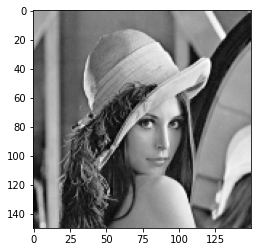

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
'''
添加高斯噪声
'''
def gasuss_noise(img, mean=0, var=0.01):
  out = np.zeros(img.shape)
  noise = np.random.normal(mean, var**2, img.shape)
  out = img + noise
  out[out < 0] = 0
  out[out > 255] = 255
  out = np.array(out, dtype='uint8')
  return out

In [ ]:
'''
添加椒盐噪声
'''
def salt_noise(img, percetage=0.01):
  h, w = img.shape
  out = img.copy()
  noiseNum = int(h * w * percetage)
  for i in range(noiseNum):
    randr = np.random.randint(0, h)
    randc = np.random.randint(0, w)
    if np.random.random() <= 0.5:
      out[randr, randc] = 0
    else:
      out[randr, randc] = 255
  return out

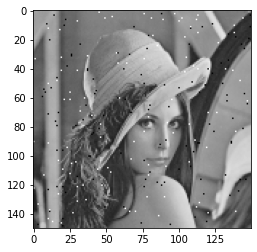

In [ ]:
salt_noise_img = salt_noise(img)
plt.imshow(salt_noise_img, cmap='gray')

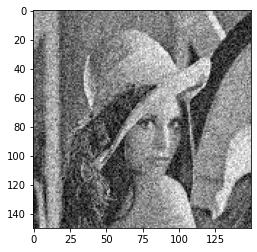

In [ ]:
gasuss_noise_img = gasuss_noise(img, var=5)
plt.imshow(gasuss_noise_img, cmap='gray')

- 算术均值滤波器

$$
f(x, y) = \frac{1}{mn}\sum_{(s, t)\in S_{x,y}}g(s, t)
$$

In [ ]:
def conv2d(img, filters):
  h, w = img.shape
  fh, fw = filters.shape

  # padding
  padding_h = int((fh - 1) / 2)
  padding_w = int((fw - 1) / 2)
  new_img = np.zeros(shape=(h + 2 * padding_h, w + 2 * padding_w))
  new_img[padding_h:h+padding_h, padding_w: w + padding_w] = img

  # conv2d
  out = np.zeros(shape=img.shape)

  for i in range(h):
    for j in range(w):
      out[i, j] = np.sum(new_img[i: i + fh, j : j + fw] * filters)
  
  return out

In [ ]:
def smoothing_filters(img, filters=[[1, 1, 1], [1, 1, 1], [1, 1, 1]]):
  filters = filters / np.sum(filters)
  out = conv2d(img, filters)
  out = np.array(out, dtype='uint8')
  return out

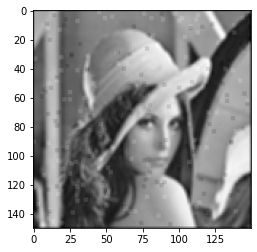

In [ ]:
out = smoothing_filters(salt_noise_img)
plt.imshow(out, cmap='gray')

- 几何均值滤波器


$$
f(x, y) = [\prod_{(s, t)\in S_{x,y}}g(s, t)]^{\frac{1}{mn}}
$$


In [ ]:
def geometric_smoothing_filters(img, filters):
  h, w = img.shape
  fh, fw = filters

  # padding
  padding_h = int((fh - 1) / 2)
  padding_w = int((fw - 1) / 2)
  new_img = np.zeros(shape=(h + 2 * padding_h, w + 2 * padding_w))
  new_img[padding_h:h+padding_h, padding_w: w + padding_w] = img

  # conv2d
  out = np.zeros(shape=img.shape)

  for i in range(h):
    for j in range(w):
      out[i, j] = np.power(np.cumprod(new_img[i: i + fh, j : j + fw])[-1], 1/(fh*fw))

  return out

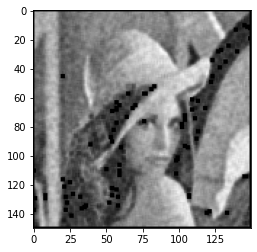

In [ ]:
out = geometric_smoothing_filters(gasuss_noise_img, (3, 3))
plt.imshow(out, cmap='gray')

- 谐波均值滤波器

$$
f(x, y) = \frac{mn}{\sum_{(s, t)\in S_{x,y}}\frac{1}{g(s, t)}}
$$

In [ ]:
def harmonic_filters(img, filters_shape):
  h, w = img.shape
  fh, fw = filters_shape
  
  # padding
  padding_h = int((fh - 1) / 2)
  padding_w = int((fw - 1) / 2)
  new_img = np.ones(shape=(h + 2 * padding_h, w + 2 * padding_w))
  new_img[padding_h:h+padding_h, padding_w: w + padding_w] = img

  out = np.zeros(shape=img.shape)

  for i in range(h):
    for j in range(w):
      sums = 0
      for x in range(i, i + fh):
        for y in range(j, j + fw):
          sums += 1/new_img[x, y]
      out[i, j] = fh * fw / sums
  
  return out

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


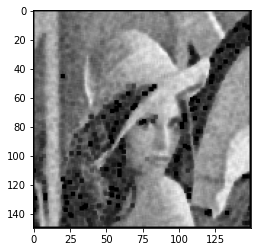

In [ ]:
out = harmonic_filters(gasuss_noise_img, (3, 3))
plt.imshow(out, cmap='gray')

- 逆谐波均值滤波器

$$
f(x, y) = \frac{\sum_{(s, t)\in S_{x,y}}g(s, t)^{(Q+1)}}{\sum_{(s, t)\in S_{x,y}}g(s, t)^Q}
$$


In [ ]:
def I_harmonic_filters(img, filters=(3, 3), Q=1):
  h, w = img.shape
  fh, fw = filters

  # padding
  padding_h = int((fh - 1) / 2)
  padding_w = int((fw - 1) / 2)
  new_img = np.zeros(shape=(h + 2 * padding_h, w + 2 * padding_w))
  new_img[padding_h:h+padding_h, padding_w: w + padding_w] = img

  # conv2d
  out = np.zeros(shape=img.shape)

  for i in range(h):
    for j in range(w):
      a = np.sum(new_img[i: i + fh, j : j + fw] **(Q+1))
      b = np.sum(new_img[i: i + fh, j : j + fw] **(Q))
      out[i, j] = a / b  
  return out

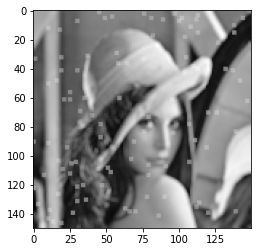

In [ ]:
out = I_harmonic_filters(salt_noise_img)
plt.imshow(out, cmap='gray')

- 中值滤波器

$$
f(x, y) = median_{(s, t)\in S_{x,y}}g(s, t)
$$

In [ ]:
def median_filters(img, filters_shape):
  h, w = img.shape
  fh, fw = filters_shape

  # padding
  padding_h = int((fh - 1) / 2)
  padding_w = int((fw - 1) / 2)
  new_img = np.zeros(shape=(h + 2 * padding_h, w + 2 * padding_w))
  new_img[padding_h:h+padding_h, padding_w: w + padding_w] = img

  # argsort(a), 返回从小到大的(索引)
  out = np.zeros(shape=img.shape, dtype='uint8')

  mid = int((fh * fw) / 2)
  for i in range(h):
    for j in range(w):
      mid_img = new_img[i: i + fh, j : j + fw].reshape(1, -1)[0]
      out[i, j] = mid_img[np.argsort(mid_img)[mid]]
      
  return out

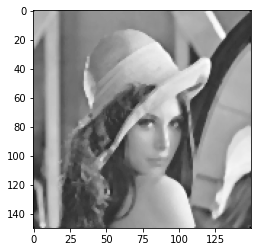

In [ ]:
out = median_filters(salt_noise_img, (3, 3))
plt.imshow(out, cmap='gray')

- 最大值&最小值滤波器

$$
f(x, y) = min_{(s, t)\in S_{x,y}}g(s, t)
$$

$$
f(x, y) = max_{(s, t)\in S_{x,y}}g(s, t)
$$

In [ ]:
def max_filters(img, filters=(3, 3)):
  h, w = img.shape
  fh, fw = filters

  # padding
  padding_h = int((fh - 1) / 2)
  padding_w = int((fw - 1) / 2)
  new_img = np.zeros(shape=(h + 2 * padding_h, w + 2 * padding_w))
  new_img[padding_h:h+padding_h, padding_w: w + padding_w] = img

  # conv2d
  out = np.zeros(shape=img.shape)

  for i in range(h):
    for j in range(w):
      out[i, j] = np.max(new_img[i: i + fh, j : j + fw])
  
  return out

def min_filters(img, filters=(3, 3)):
  h, w = img.shape
  fh, fw = filters

  # padding
  padding_h = int((fh - 1) / 2)
  padding_w = int((fw - 1) / 2)
  new_img = np.zeros(shape=(h + 2 * padding_h, w + 2 * padding_w))
  new_img[padding_h:h+padding_h, padding_w: w + padding_w] = img

  # conv2d
  out = np.zeros(shape=img.shape)

  for i in range(h):
    for j in range(w):
      out[i, j] = np.min(new_img[i: i + fh, j : j + fw])
  
  return out

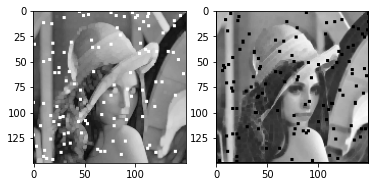

In [ ]:
out_max = max_filters(salt_noise_img)
out_min = min_filters(salt_noise_img)
plt.subplot(1, 2, 1)
plt.imshow(out_max, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(out_min, cmap='gray')

- 修正的阿尔法均值滤波器

$$
f(x, y) = \frac{1}{mn-d}\sum_{(s, t)\in S_{x,y}}g(s, t)
$$

In [ ]:
def alpha_filters(img, filters_shape, D):
  h, w = img.shape
  fh, fw = filters_shape

  d_2 = int(D / 2)

  # padding
  padding_h = int((fh - 1) / 2)
  padding_w = int((fw - 1) / 2)
  new_img = np.zeros(shape=(h + 2 * padding_h, w + 2 * padding_w))
  new_img[padding_h:h+padding_h, padding_w: w + padding_w] = img

  # argsort(a), 返回从小到大的(索引)
  out = np.zeros(shape=img.shape, dtype='uint8')

  for i in range(h):
    for j in range(w):
      mid_img = new_img[i: i + fh, j : j + fw].reshape(1, -1)[0]
      out[i, j] = np.sum(mid_img[np.argsort(mid_img)[d_2:-d_2]])/ (fh * fw - D)
  return out

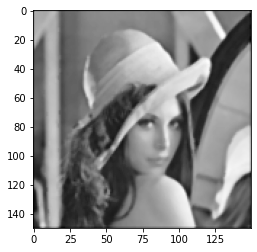

In [ ]:
out = alpha_filters(salt_noise_img, (3, 3), 4)
plt.imshow(out, cmap='gray')

- 理想带阻滤波

$$
H(u, v)=\begin{cases}
1& D(u, v)\leq D_0\\
0& D(u, v) > D_0
\end{cases}
$$

In [ ]:
'''
用矩阵乘法代替循环的加速普通傅立叶变换计算(DFT)
'''
def fourier_transform(img):
  imgx = np.zeros(img.shape)
  h, w = img.shape
  F = np.zeros(shape=(h, w), dtype='complex128')

  for i in range(h):
    for j in range(w):
      imgx[i, j] = (-1)**(i + j) * img[i, j]

  xx = np.arange(h).reshape((-1, 1))
  yy = np.arange(w)

  for u in range(h):
    for v in range(w):
      # sums = 0
      # for x in range(h):
      #   for y in range(w):
      #     sums += (-1)**(x + y) * img[x, y] * np.exp(-1.j * 2 * np.pi * (u * x / h + v * y / w))
      sums1 = np.sum(imgx * np.exp(-1.j * 2 * np.pi * (u * xx / h + v * yy / w)))
      F[u, v] = sums1
  return F

'''
傅立叶反变换(IDFT)
'''
def i_fourier_transform(F):
  h, w = F.shape
  img = np.zeros(shape=(h, w))

  uu = np.arange(h).reshape((-1, 1))
  vv = np.arange(w)

  for x in range(h):
    for y in range(w):
      # sums = 0
      # for u in range(h):
      #   for v in range(w):
      #     sums += F[x, y] * np.exp(1.j * 2 * np.pi * (u * x / h + v * y / w))
      sums1 = np.sum(F * np.exp(1.j * 2 * np.pi * (x * uu / h + y * vv / w)))
      img[x, y] = sums1.real * (-1)**(x + y)
  return img

def ilp_filter(d, img):
  h, w = img.shape
  centerx, centery = h//2, w//2

  F = fourier_transform(img)
  for i in range(h):
    for j in range(w):
      def dist(raw, col):
        return math.sqrt((raw-centerx)**2 + (col-centery)**2)
      if dist(i, j) > d:
        F[i, j] = 0
  return i_fourier_transform(F)

In [ ]:
ilp_10_img = ilp_filter(10, img)
ilp_50_img = ilp_filter(50, img)

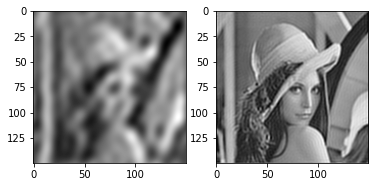

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(ilp_10_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(ilp_50_img, cmap='gray')

- 巴特沃斯带阻滤波

$$
H(u, v)=\frac{1}{1 + [D(u, v)/D_0]^{2n}}
$$

In [ ]:
def butterworth_lowpass_filter(d, img, n=2):
  h, w = img.shape
  centerx, centery = h//2, w//2

  F = fourier_transform(img)
  for i in range(h):
    for j in range(w):
      def dist(raw, col):
        return math.sqrt((raw-centerx)**2 + (col-centery)**2)
      F[i, j] = F[i, j] * 1 / (1 + (dist(i,j)/d)**(2*n))
  return i_fourier_transform(F)

In [ ]:
bwlp_10_img = butterworth_lowpass_filter(10, img)
bwlp_60_img = butterworth_lowpass_filter(60, img)

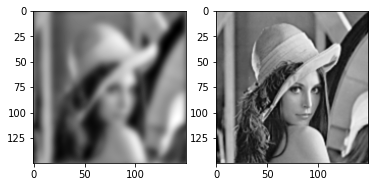

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(bwlp_10_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(bwlp_60_img, cmap='gray')

- 高斯带通滤波

$$
H(u, v)=1 - e^{-D^2(u, v)/2D_0^2}
$$

In [ ]:
def gaussian_highpass_filter(d, img, n=2):
  h, w = img.shape
  centerx, centery = h//2, w//2

  F = fourier_transform(img)
  for i in range(h):
    for j in range(w):
      def dist(raw, col):
        return math.sqrt((raw-centerx)**2 + (col-centery)**2)
      F[i, j] = F[i,j] * (1 - np.exp((-dist(i,j)**2)/(2*d**2)))
  return i_fourier_transform(F)

In [ ]:
ghp_10_img = gaussian_highpass_filter(10, img)
ghp_60_img = gaussian_highpass_filter(60, img)

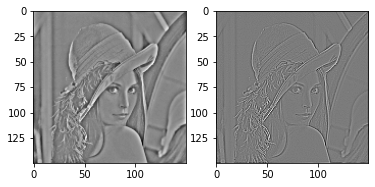

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(ghp_10_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(ghp_60_img, cmap='gray')

- 大气模糊

$$
H(u, v) = e^{-k(u^2 +v ^2)^{5/6}}
$$

In [ ]:
# T / (np.pi * (u*a + v*b)) * np.sin(np.pi*(u*a + v*b))*np.exp(-1.j*np.pi*(u*a + v*b))
def sky_img(img, k=0.00025):
  h, w = img.shape
  f = np.fft.fft2(img)
  f_shift = np.fft.fftshift(f)
  for u in range(1, h):
    for v in range(1, w):
      f_shift[u, v] *= np.exp(-k*(u**2 + v**2)**(5/6))
  i_shift = np.fft.ifftshift(f_shift)
  out_img = np.fft.ifft2(i_shift)
  return out_img.real

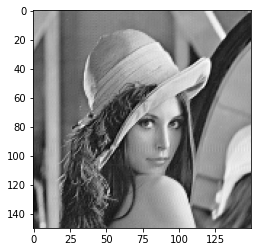

In [ ]:
sky_out = sky_img(img, k=0.0005)
plt.imshow(sky_out, cmap='gray')

- 逆滤波

$$
H(u, v) = e^{-k((u-M/2)^2 +(v-N/2) ^2)^{5/6}}
$$

In [ ]:
def i_sky_img(img, k=0.00025):
  h, w = img.shape
  f = np.fft.fft2(img)
  f_shift = np.fft.fftshift(f)
  for u in range(1, h):
    for v in range(1, w):
      f_shift[u, v] = f_shift[u, v] / np.exp(-k*((u-h/2)**2 + (v-w/2)**2)**(5/6))
      # f_shift[u, v] /= np.exp(-k*(u**2 + v**2)**(5/6))
  i_shift = np.fft.ifftshift(f_shift)
  out_img = np.fft.ifft2(i_shift)
  return out_img.real

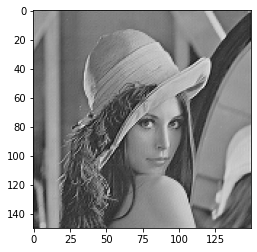

In [ ]:
i_sky_out = i_sky_img(sky_out, k = 0.0005)
plt.imshow(i_sky_out, cmap='gray')

- 最小均方差滤波

$$
F(u, v) = [\frac{1}{H(u, v)}\frac{|H(u, v)|^2}{|H(u, v)|^2 + K}]G(u, v)
$$

In [ ]:
def mean_filter(img, k=0.00025):
  h, w = img.shape
  f = np.fft.fft2(img)
  f_shift = np.fft.fftshift(f)
  for u in range(1, h):
    for v in range(1, w):
      f_shift[u, v] = f_shift[u, v] / np.exp(-k*(u**2 + v**2)**(5/6)) * (np.exp(-k*(u**2 + v**2)**(5/6)))**2 / ((np.exp(-k*(u**2 + v**2)**(5/6)))**2 + k)
      # f_shift[u, v] /= np.exp(-k*(u**2 + v**2)**(5/6))
  i_shift = np.fft.ifftshift(f_shift)
  out_img = np.fft.ifft2(i_shift)
  return out_img.real

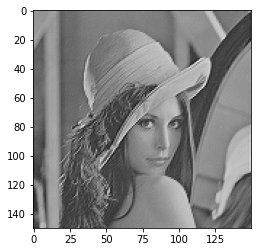

In [ ]:
mean_sky_out = mean_filter(sky_out, k = 0.0005)
plt.imshow(mean_sky_out, cmap='gray')